## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Collection & Analysis

In [2]:
# loading the data from csv to pandas DF
customers_data=pd.read_csv("Mall_Customers.csv")

In [3]:
customers_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Finding the NO of Rows & Columns
customers_data.shape

(200, 5)

In [5]:
# Getting the info about dataset
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Checking for Missing Values
customers_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
customers_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
import missingno as msno

<Axes: >

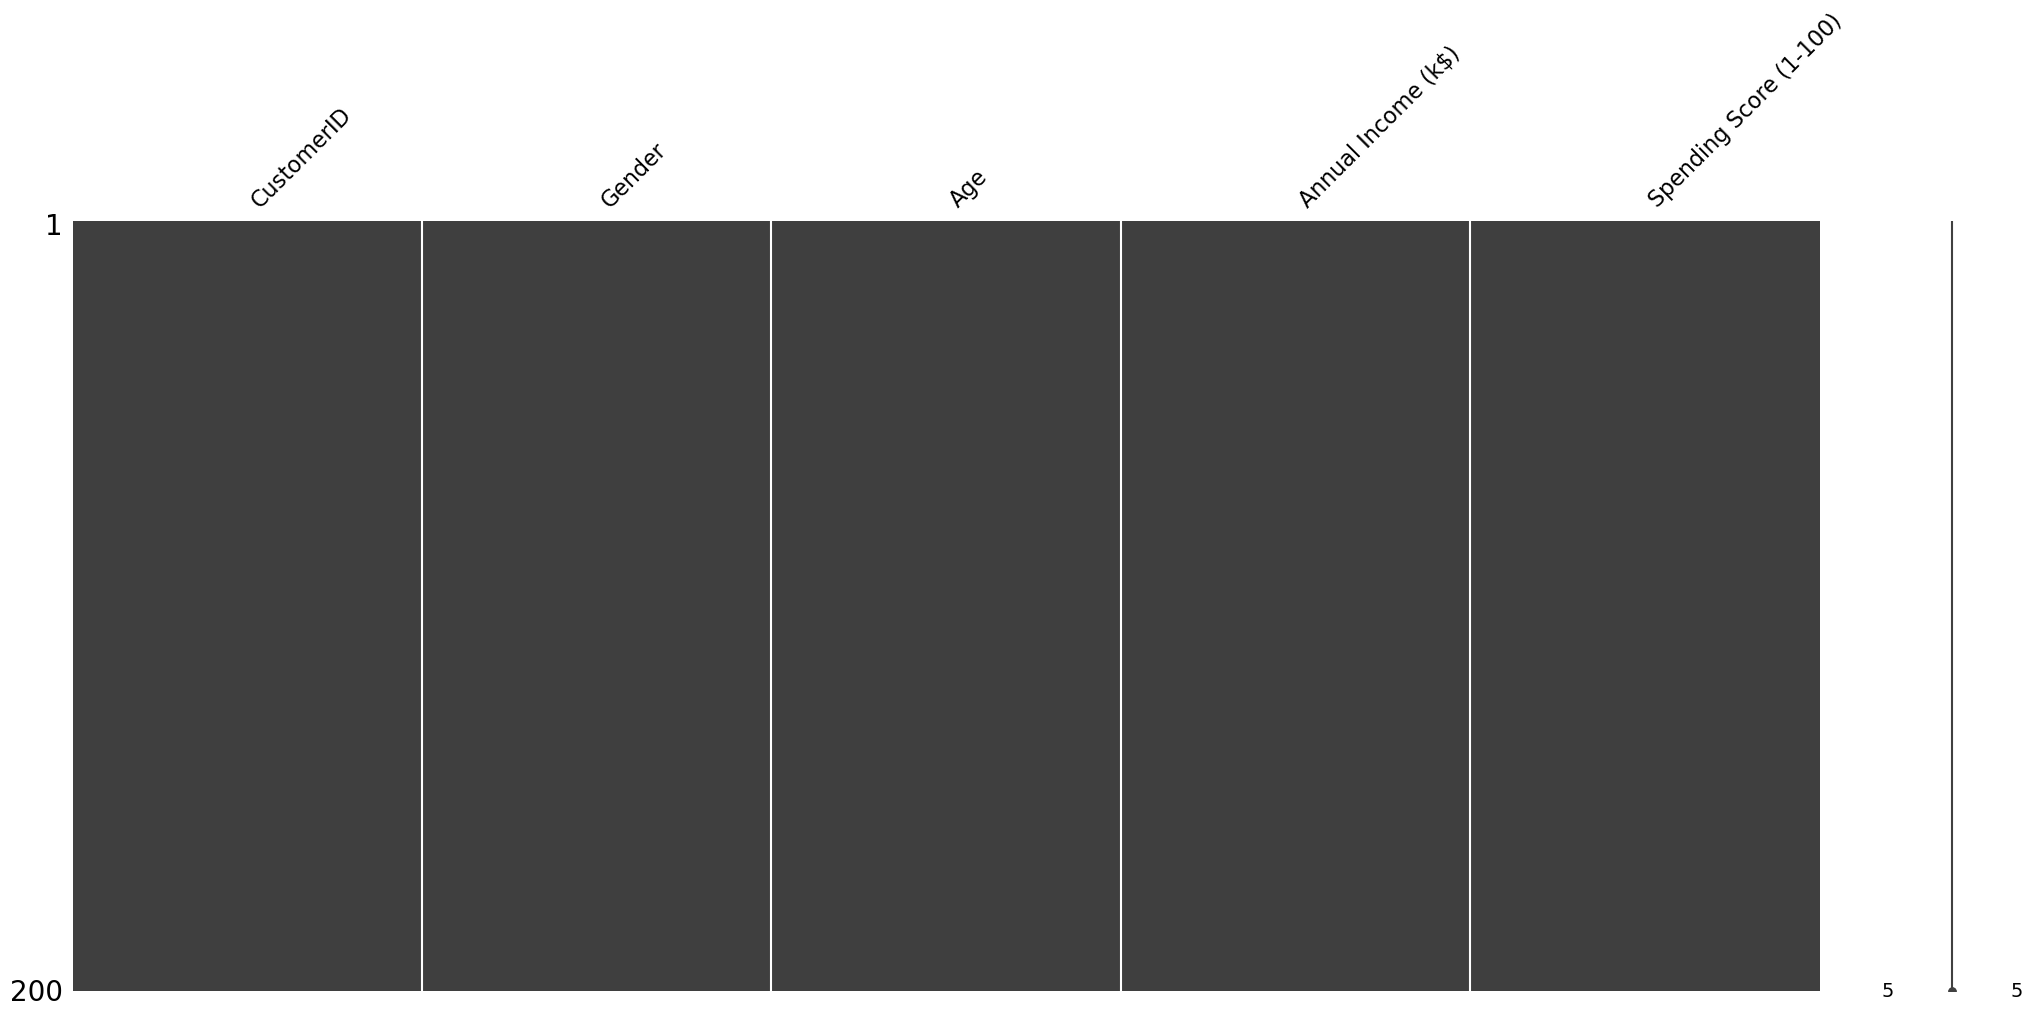

In [9]:
msno.matrix(customers_data)

## Data Visualization & EDA

In [10]:
customers_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\91981\AppData\Local\Temp\ipykernel_13372\2420867136.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers_data['Age'])
C:\Users\91981\AppData\Local\Temp\ipykernel_13372\2420867136.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customers_data['Annual Income (k$)'])
C:\Users\

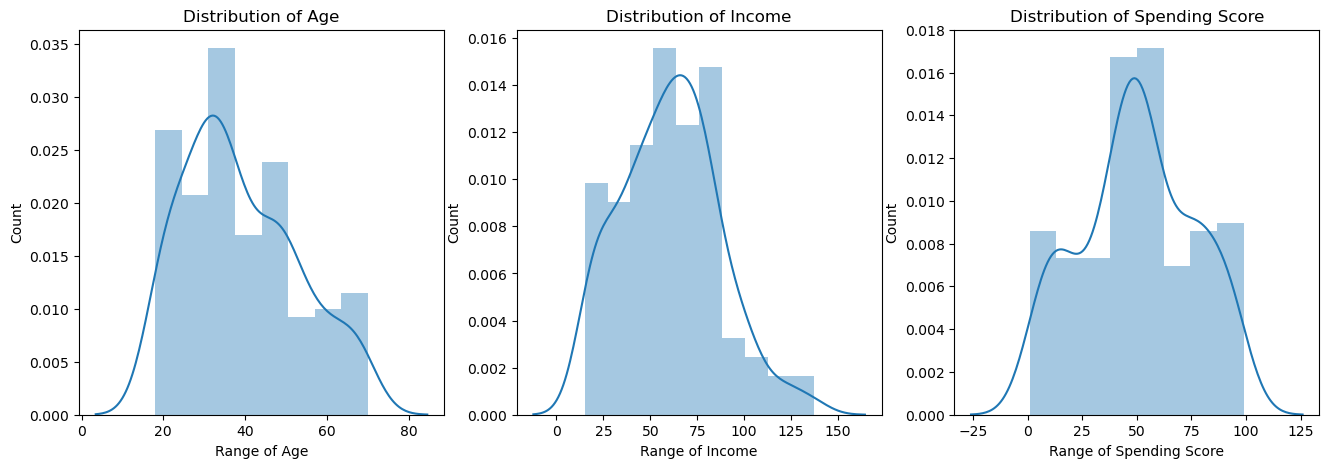

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(customers_data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Range of Age")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.distplot(customers_data['Annual Income (k$)'])
plt.title("Distribution of Income")
plt.xlabel("Range of Income")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.distplot(customers_data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.xlabel("Range of Spending Score")
plt.ylabel("Count")
plt.show()

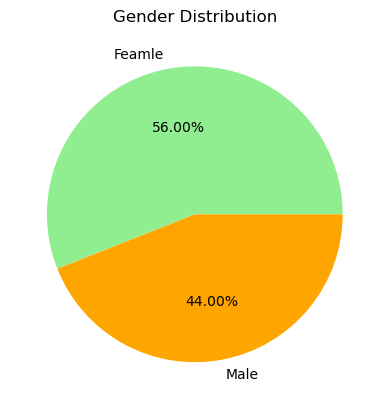

In [12]:
df=customers_data.groupby("Gender").size()
df.plot(kind='pie', subplots=True, colors=['lightgreen',"orange"],explode=[0,0.001], labels=["Feamle", "Male"],autopct='%.2f%%')
plt.title("Gender Distribution")

plt.show()

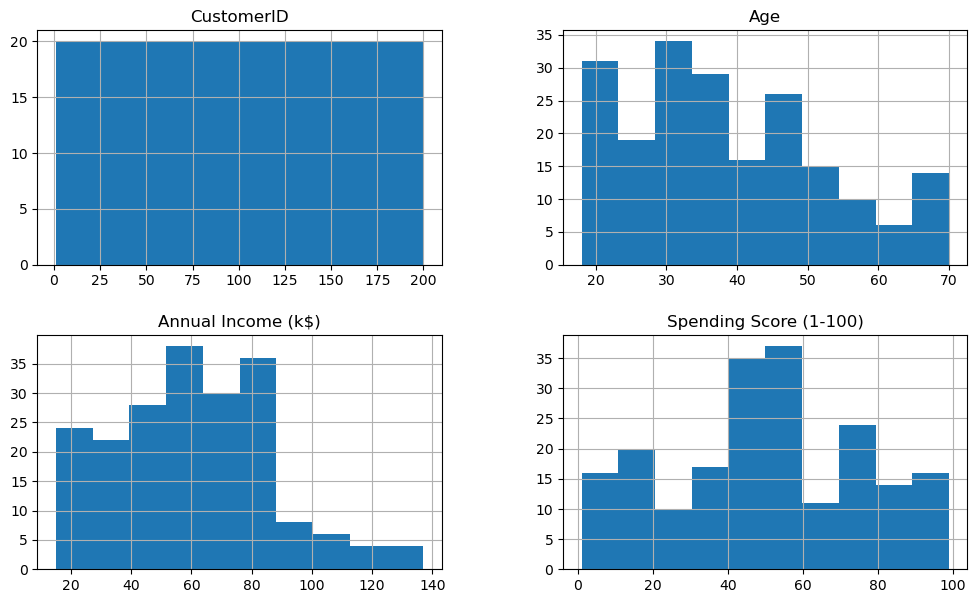

In [13]:
customers_data.hist(figsize=(12,7))
plt.show()

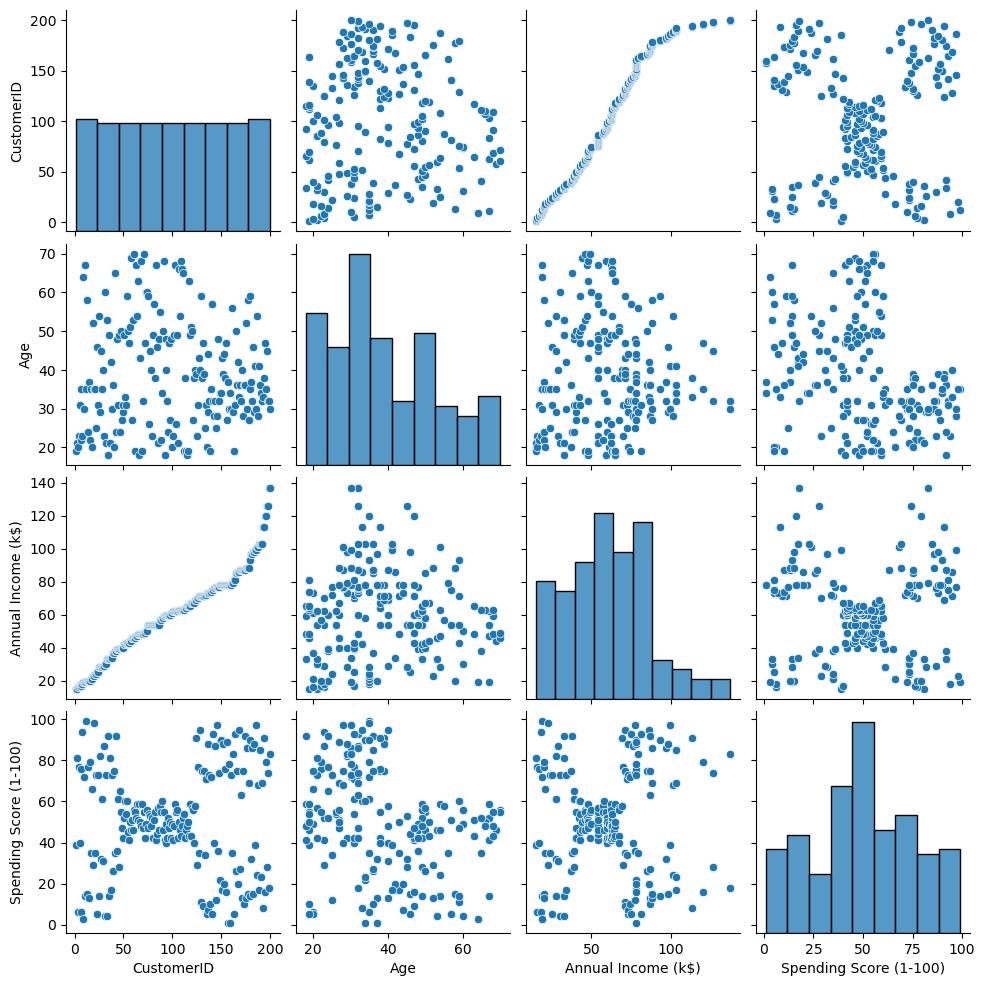

In [14]:
sns.pairplot(customers_data)
plt.show()

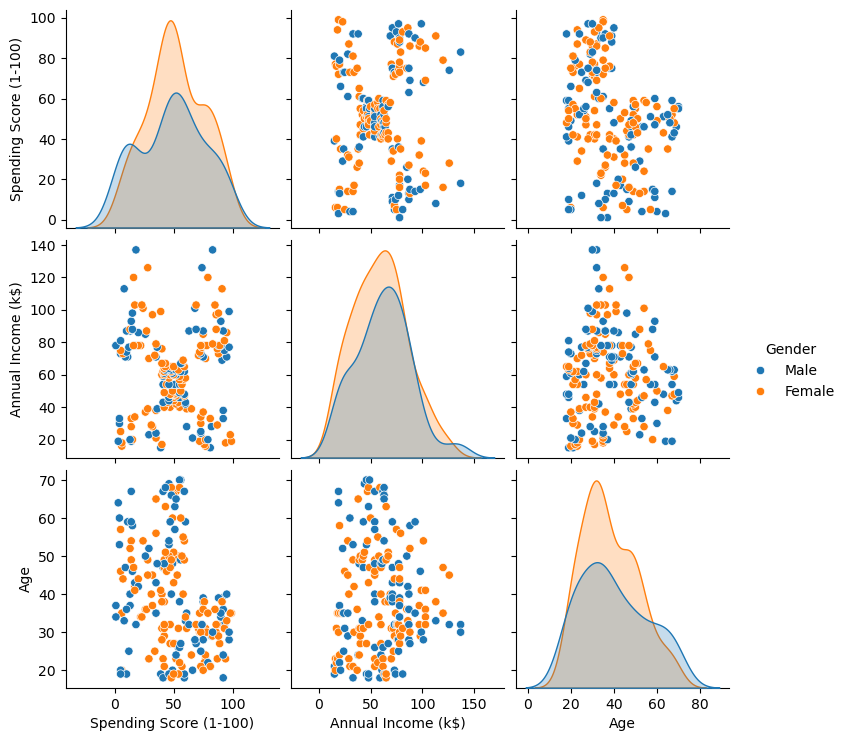

In [15]:
sns.pairplot(customers_data, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue='Gender')
plt.show()

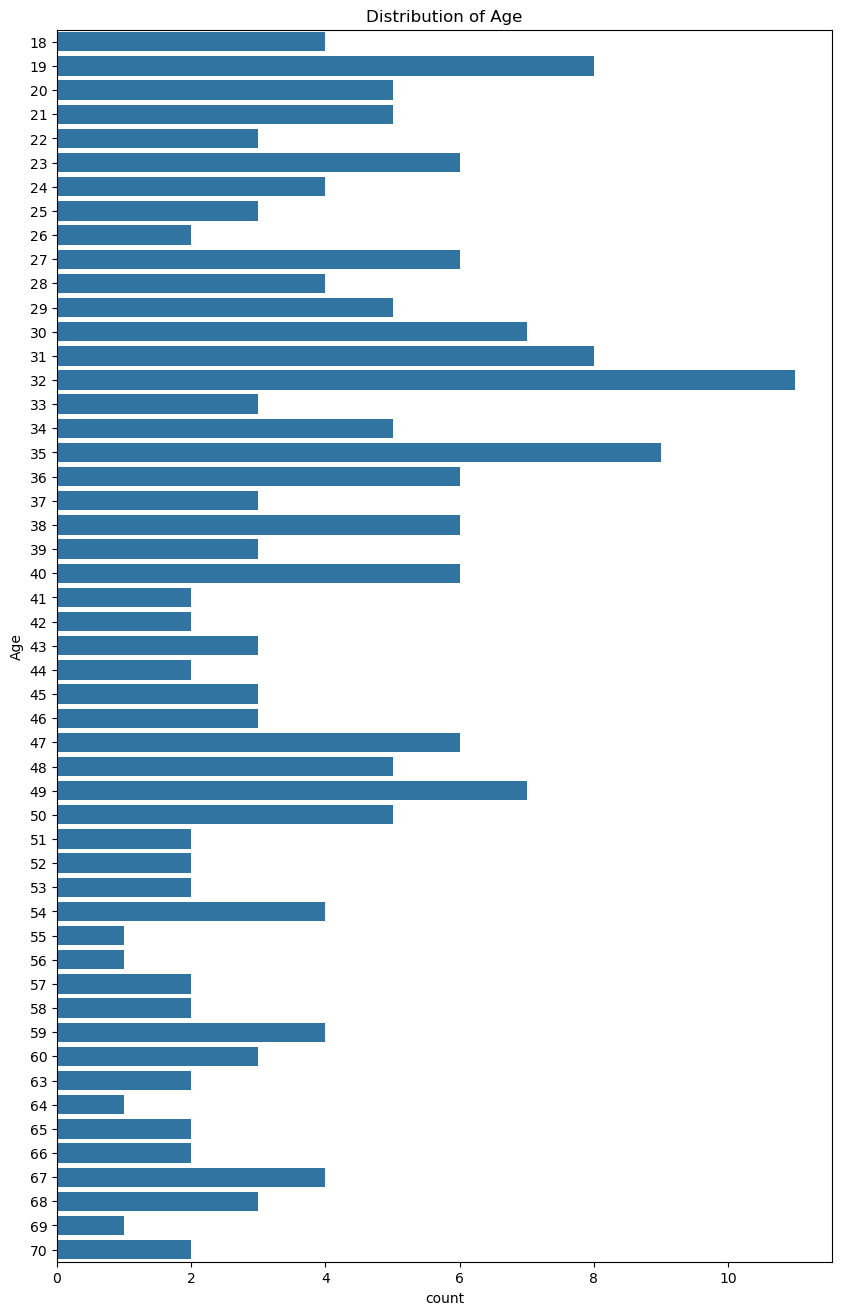

In [16]:
plt.figure(figsize=(10,16))
sns.countplot(y=customers_data['Age'])
plt.title("Distribution of Age")
plt.show()

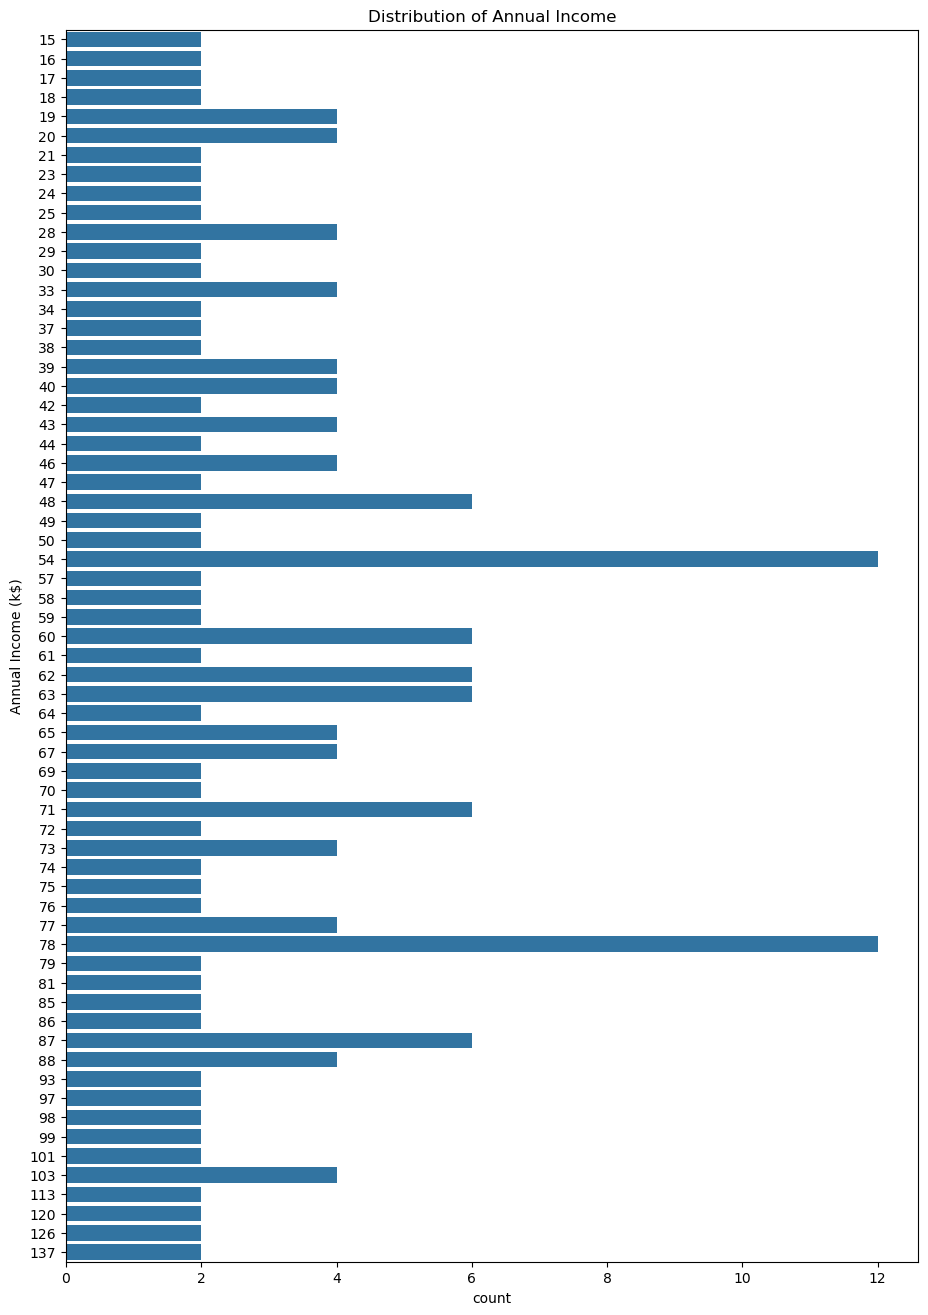

In [17]:
plt.figure(figsize=(11,16))
sns.countplot(y=customers_data['Annual Income (k$)'])
plt.title("Distribution of Annual Income")
plt.show()

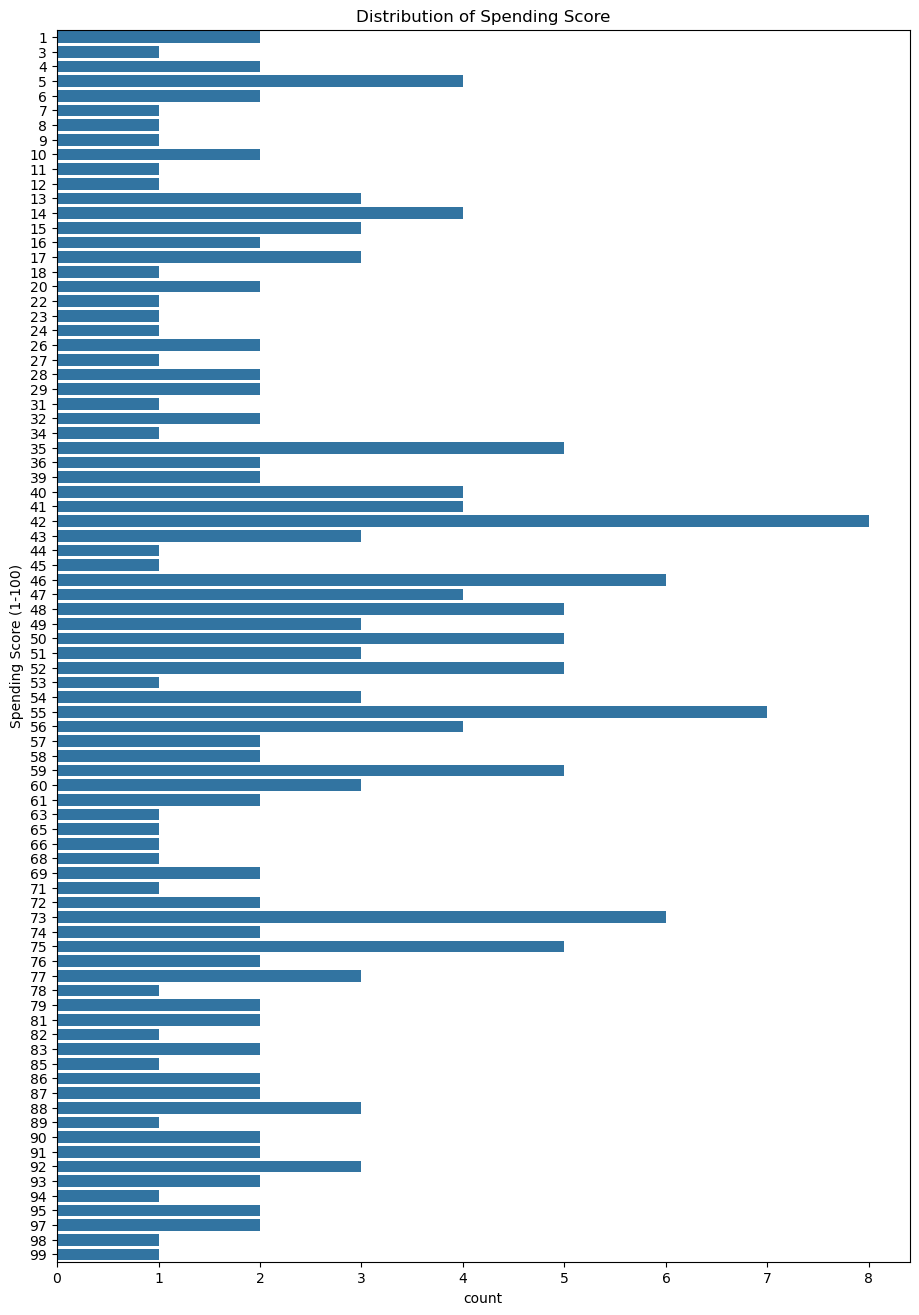

In [18]:
plt.figure(figsize=(11,16))
sns.countplot(y=customers_data['Spending Score (1-100)'])
plt.title("Distribution of Spending Score")
plt.show()

In [19]:
import dabl

Target looks like regression


C:\Users\91981\anaconda3\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=8.13E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

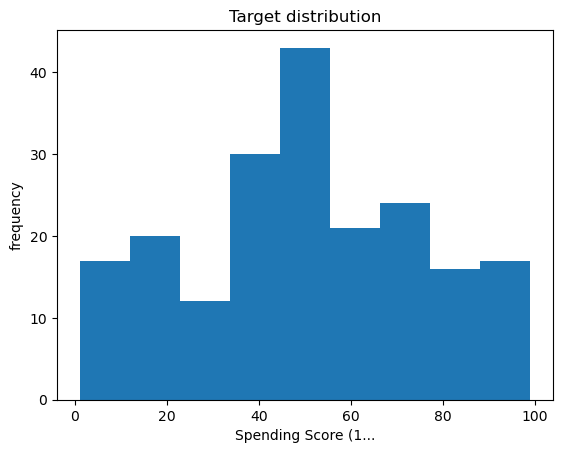

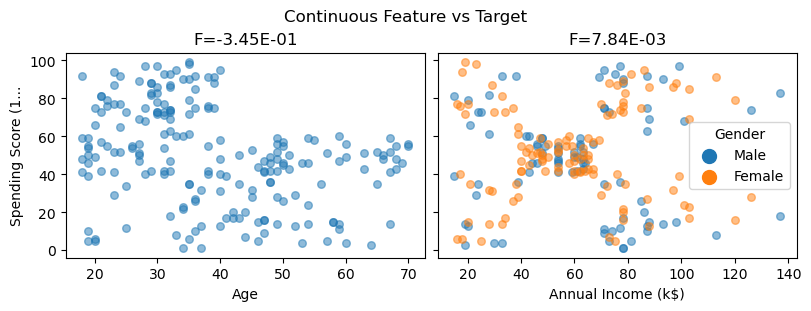

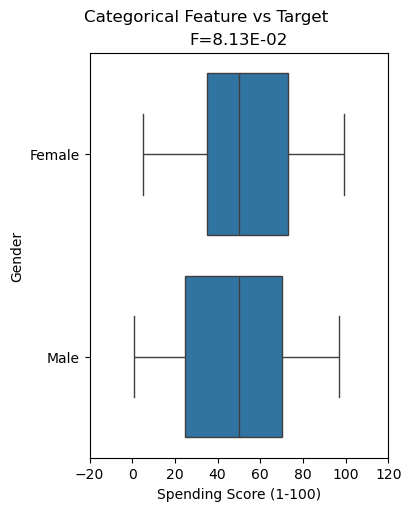

In [20]:
dabl.plot(customers_data, target_col="Spending Score (1-100)")

Target looks like regression


C:\Users\91981\anaconda3\Lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=0.00E+00'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

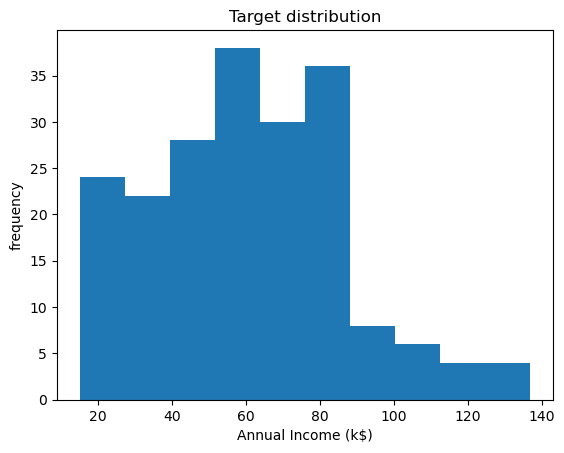

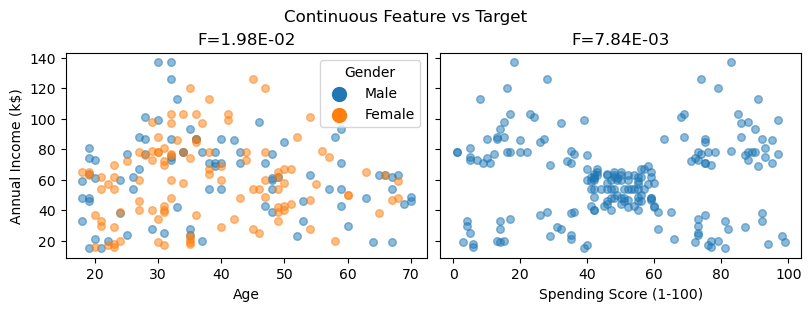

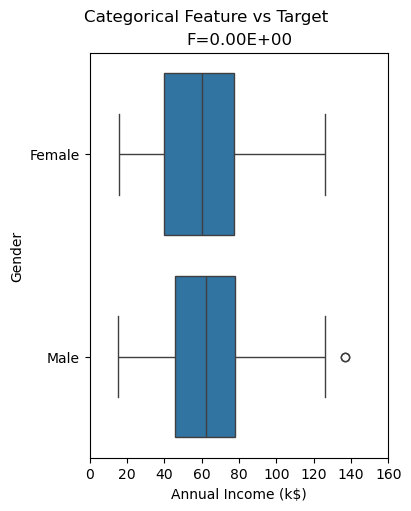

In [21]:
dabl.plot(customers_data, target_col="Annual Income (k$)")

In [22]:
sns.heatmap(customers_data.corr(), cmap='Wistia', annot=True)
plt.show()

ValueError: could not convert string to float: 'Male'

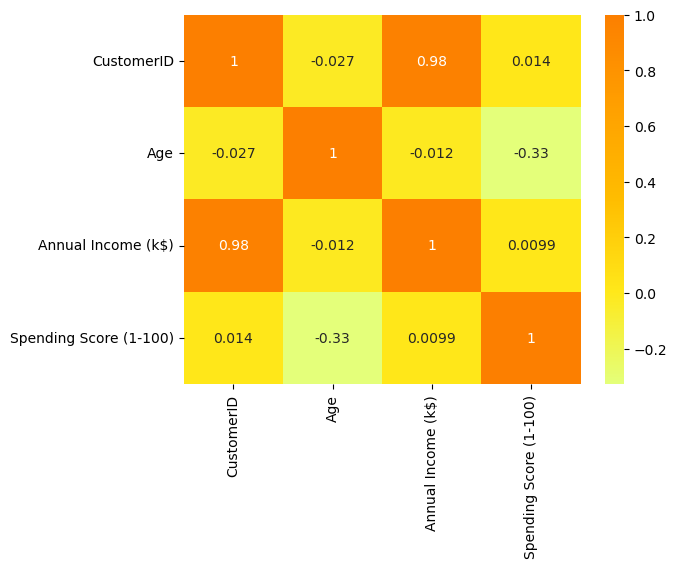

In [23]:
# Select only numeric columns for correlation
numeric_data = customers_data.select_dtypes(include=[float, int])

# Generate the heatmap
sns.heatmap(numeric_data.corr(), cmap='Wistia', annot=True)
plt.show()

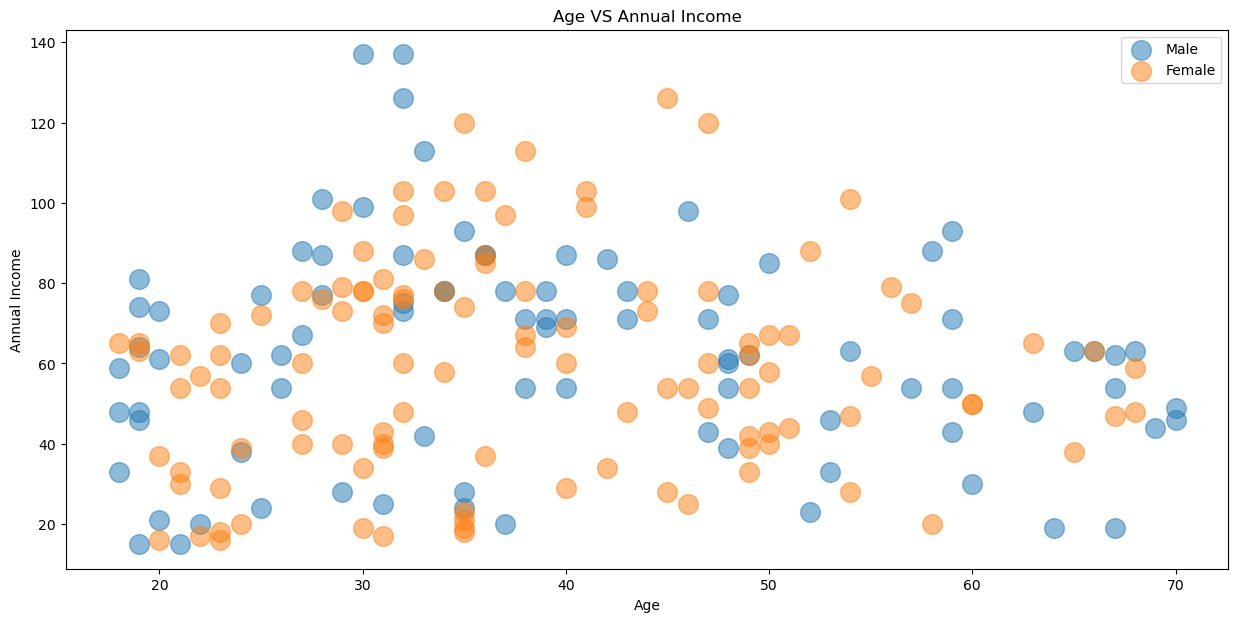

In [24]:
plt.figure(figsize=(15,7))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Annual Income (k$)', data=customers_data[customers_data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.title("Age VS Annual Income")
plt.legend()
plt.show()

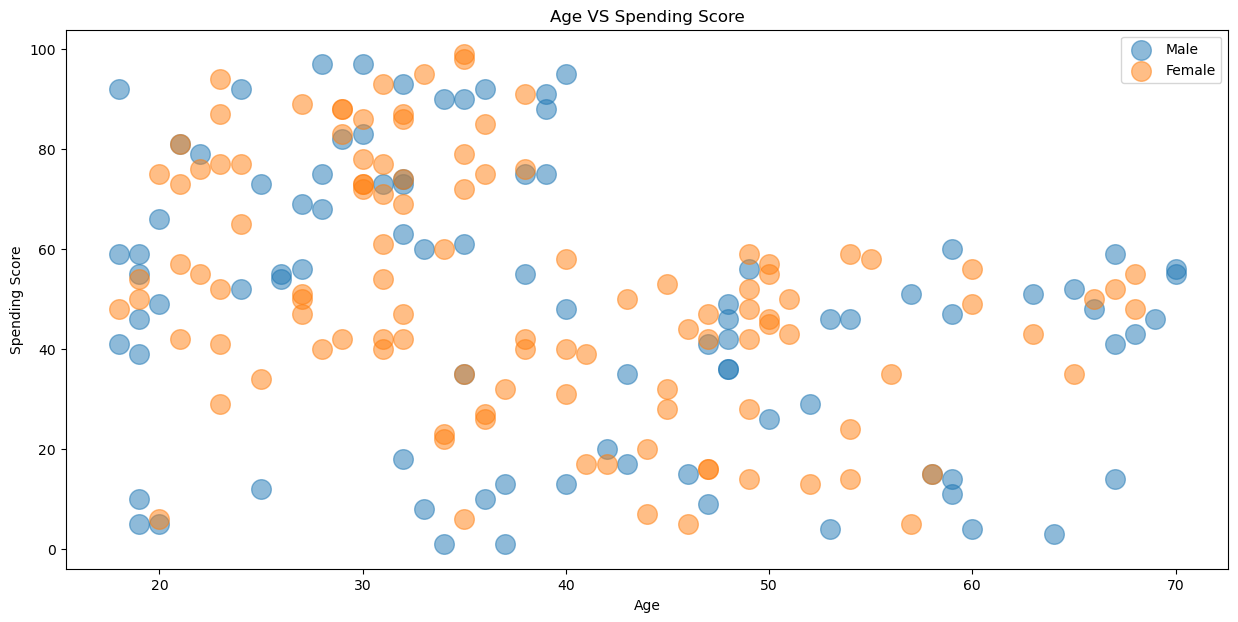

In [25]:
plt.figure(figsize=(15,7))
for gender in ['Male', 'Female']:
    plt.scatter(x='Age', y='Spending Score (1-100)', data=customers_data[customers_data['Gender']==gender], s=200, alpha=0.5, label=gender)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age VS Spending Score")
plt.legend()
plt.show()

## Choosing the annual income and spending score column

In [26]:
x=customers_data.iloc[:,[3,4]].values

In [27]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Choosing the No of Clusters

### WCSS->Within Clusters Sum of Squares

In [28]:
#finding WCSS value for different no of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\91981\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91981\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91981\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91981\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

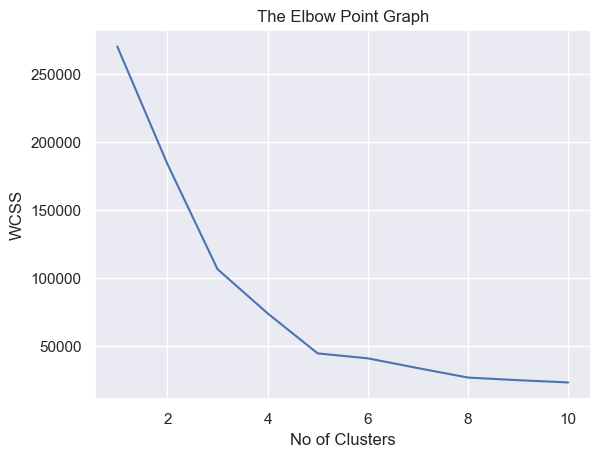

In [29]:
# Plot an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

## Optimum No of Clusters =5 

## Training K-Means Clustering Model

In [30]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=0)

#Return a label for each data point based on their cluster
y=kmeans.fit_predict(x)
print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


C:\Users\91981\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualizing all the clusters

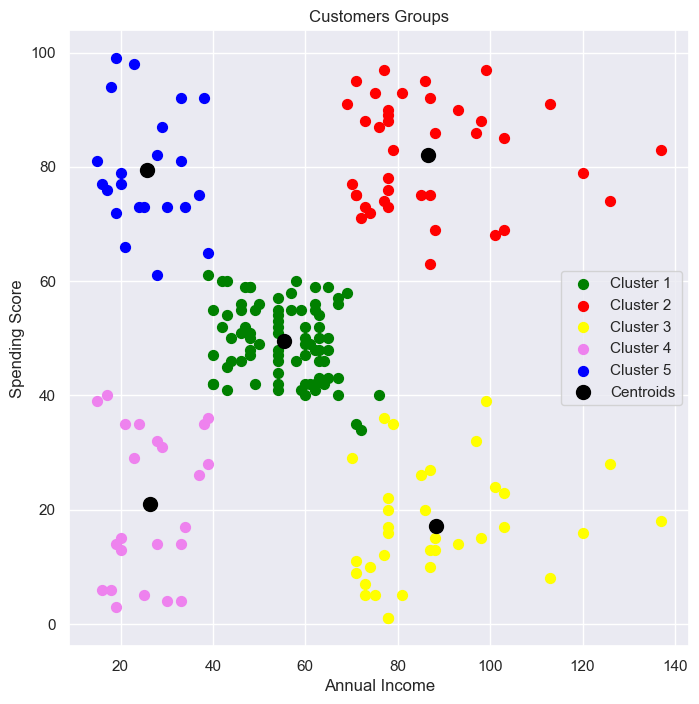

In [31]:
# Plotting all clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label="Centroids")
plt.title('Customers Groups')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()


In [32]:
kmeans.predict([[15,39]])

array([3])

## Save the Model

In [33]:
import joblib

In [34]:
joblib.dump(kmeans,"Customer_Segmentation")

['Customer_Segmentation']

In [35]:
model=joblib.load("Customer_Segmentation")

In [36]:
model.predict([[15,39]])

array([3])

## GUI

In [37]:
from tkinter import *
import joblib

In [38]:
def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())

    model = joblib.load('Customer_Segmentation')
    result = model.predict([[p1, p2]])
    print("This Customer Belongs to cluster No : ", result[0])

    if result[0] == 0:
        Label(master, text="Customer with Medium Annual Income and Medium Annual Spending").grid(row=4, columnspan=2)
    elif result[0] == 1:
        Label(master, text="Customer with High Annual Income and High Annual Spending").grid(row=4, columnspan=2)
    elif result[0] == 2:
        Label(master, text="Customer with High Annual Income and Low Annual Spending").grid(row=4, columnspan=2)
    elif result[0] == 3:
        Label(master, text="Customer with Low Annual Income and Low Annual Spending").grid(row=4, columnspan=2)
    elif result[0] == 4:
        Label(master, text="Customer with Low Annual Income and High Annual Spending").grid(row=4, columnspan=2)

master = Tk()
master.title("Customer Segmentation Using Machine Learning")

label = Label(master, text="Customer Segmentation Using Machine Learning", bg="black", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)

e1 = Entry(master)
e2 = Entry(master)
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text="Predict", command=show_entry_fields).grid(row=3, columnspan=2)

mainloop()


This Customer Belongs to cluster No :  3
